#  Challenge : Exploratory Data Analysis w/ Pandas and Matplotlib


Let's switch gears and work with a real data set from homes being sold in the Seattle area.

Let's start by reading and exploring the data.

In [112]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
# this sttement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [113]:
data = pd.read_csv('data/SeattleHomePrices.csv')

## Problem 1
Let's use a subset of the data set that only contains the following columns: PROPERTY TYPE, ZIP, PRICE, BEDS, BATHS, SQUARE FEET, DAYS ON MARKET. Save it in a Pandas Dataframe named small_data.

In [114]:
small_data = data[['PROPERTY TYPE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'DAYS ON MARKET']]
small_data

,PROPERTY TYPE,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,DAYS ON MARKET
0,Condo/Co-op,98109,459000,2,1.00,760.0,1
1,Single Family Residential,98105,648000,3,1.75,1170.0,1
2,Single Family Residential,98146,440000,3,1.75,1510.0,1
3,Single Family Residential,98115,715000,3,1.00,1820.0,1
4,Condo/Co-op,98109,749900,1,1.50,1013.0,5
...,...,...,...,...,...,...,...
345,Condo/Co-op,98119,450000,1,1.00,501.0,83
346,Vacant Land,98178,120000,0,NaN,NaN,84
347,Single Family Residential,98106,488900,3,2.00,1610.0,85
348,Condo/Co-op,98102,779000,3,3.00,1833.0,85


## Problem 2

    *Show a sample of 5 houses
    *Get a summary of the numerical values

In [115]:
small_data.sample(5)

,PROPERTY TYPE,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,DAYS ON MARKET
57,Vacant Land,98115,2600000,0,NaN,NaN,1
261,Single Family Residential,98119,1050000,3,1.75,1510.0,25
190,Single Family Residential,98117,565500,2,1.00,900.0,9
143,Single Family Residential,98112,2350000,5,3.00,4700.0,7
273,Single Family Residential,98136,1150000,4,2.25,3100.0,29


In [118]:
c=small_data.dropna()
column_1 = c["PRICE"]
column_2 = c["SQUARE FEET"]
correlation = column_1.corr(column_2)
correlation

0.7884593476939279

## Problem 3
Our data set contains 350 houses.  However, there are some NULL values in SQUARE FEET and BATHS.  Let's drop the houses with at least 1 NULL value in any of the columns of the dataset.

**Hint:** Pandas dropna

In [106]:
small_data.dropna()

,PROPERTY TYPE,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,DAYS ON MARKET
0,Condo/Co-op,98109,459000,2,1.00,760.0,1
1,Single Family Residential,98105,648000,3,1.75,1170.0,1
2,Single Family Residential,98146,440000,3,1.75,1510.0,1
3,Single Family Residential,98115,715000,3,1.00,1820.0,1
4,Condo/Co-op,98109,749900,1,1.50,1013.0,5
...,...,...,...,...,...,...,...
344,Single Family Residential,98108,670000,4,2.50,1104.0,83
345,Condo/Co-op,98119,450000,1,1.00,501.0,83
347,Single Family Residential,98106,488900,3,2.00,1610.0,85
348,Condo/Co-op,98102,779000,3,3.00,1833.0,85


## Problem 4
Create a histograms that shows the distribution of the number of BEDS

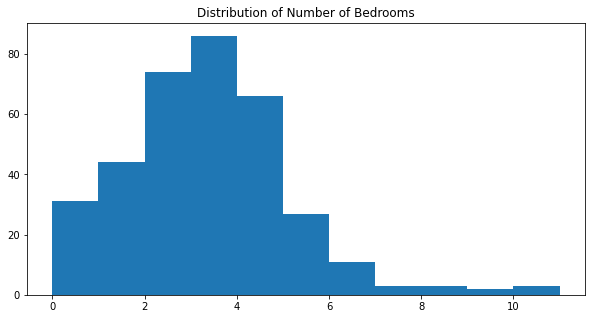

In [107]:
plt.figure(figsize=[10,5])

# plt.hist(small_data['BEDS'])
plt.hist(small_data['BEDS'],small_data['BEDS'].max())
plt.title('Distribution of Number of Bedrooms');

## Problem 5

Create a pie chart that shows the percenatge of houses with more than 2 bathrooms, compared to 2 or less bathrooms.

153 171


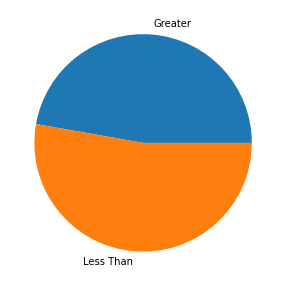

In [108]:
greater = len(small_data[small_data['BATHS']>2])
lessthan = len(small_data[small_data['BATHS']<=2])
print(greater,lessthan)
plt.figure(figsize=[5,5])
plt.pie([greater,lessthan],labels=['Greater','Less Than']);

## Problem 6

Create two scatter plots that shows the PRICE in the $y$ axis and the SQUARE FEET in the $x$-axis.

1) One scatter plot should be in a normal scale.

2) The other scatter plot should have a log-log scale.

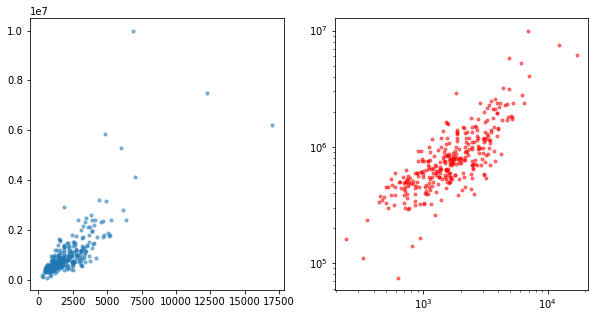

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(small_data['SQUARE FEET'],small_data['PRICE'],alpha = 0.5,s=10);

plt.subplot(1,2,2)
plt.loglog(small_data['SQUARE FEET'],small_data['PRICE'],'r.',alpha = 0.5);

## Problem 7 (Challenge)

Create a bar chart that shows the different PROPERTY TYPEs in the $x$-axis, and the average days on the market on the $y$-axis.

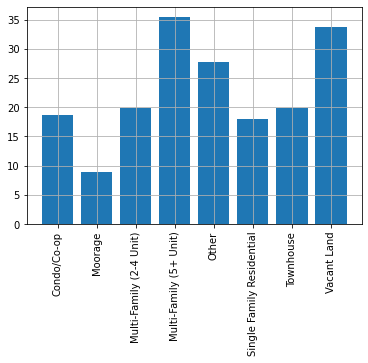

In [31]:
PropType = small_data.groupby(['PROPERTY TYPE'])['DAYS ON MARKET'].mean()
plt.bar(range(len(PropType)),PropType.values)
plt.xticks(range(len(PropType)),PropType.index,rotation = 90)
plt.grid();